In [21]:
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot
import pandas as pd
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# read the charts dataset
tracks_df = pd.read_csv('df_charts_tracks_artists.csv')
tracks_df

,Unnamed: 0,date,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,total_followers,genres,artist_popularity
0,0,2018-01-01,1,0ofbQMrRDsUaVKq2mGLEAb,Havana,Camila Cabello,155633,4nDoRrQiYLoBzwC5BhVJzF,Camila Cabello,5chBPOVY2I0bG5V3igb5QL,...,0,0.0312,0.18600,0.000038,0.1040,0.418,104.992,18078605,"['dance pop', 'pop', 'post-teen pop']",87
1,1,2018-01-01,2,0tgVpDi06FyKpA1z0VMD4v,Perfect,Ed Sheeran,134756,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,3T4tUhGYeRNVUGevb0wThu,...,1,0.0232,0.16300,0.000000,0.1060,0.168,95.050,69753264,"['pop', 'uk pop']",93
2,2,2018-01-01,3,3hBBKuWJfxlIlnd9QFoC8k,What Lovers Do (feat. SZA),Maroon 5,130898,04gDigrS5kc9YWfZHwBETP,Maroon 5,1Jmq5HEJeA9kNi2SgQul4U,...,0,0.0671,0.07860,0.000003,0.0855,0.393,110.009,26892218,"['pop', 'pop rock']",90
3,3,2018-01-01,4,1mXVgsBdtIVeCLJnSnmtdV,Too Good At Goodbyes,Sam Smith,130798,2wY79sveU1sp5g7SokKOiI,Sam Smith,3TJz2UBNYJtlEly0sPeNrQ,...,1,0.0432,0.64000,0.000000,0.1690,0.476,91.873,13815441,"['pop', 'post-teen pop', 'uk pop']",89
4,4,2018-01-01,5,2ekn2ttSfGqwhhate0LSR0,New Rules,Dua Lipa,125472,6M2wZ9GZgrQXHCFfjv46we,Dua Lipa,01sfgrNbnnPUEyz6GZYlt9,...,0,0.0694,0.00261,0.000016,0.1530,0.608,116.073,19536508,"['dance pop', 'pop', 'uk pop']",93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197795,197795,2020-09-15,196,2aI2k39nfa3KFsa4JclQzw,DDU-DU DDU-DU,BLACKPINK,26632,41MozSoPIsD1dJM0CLPjZF,BLACKPINK,2zwfcNqJe7IT1RwgVyv1ug,...,0,0.0833,0.03230,0.000000,0.2670,0.389,139.931,14849285,"['k-pop', 'k-pop girl group']",90
197796,197796,2020-09-15,197,2JoZzpdeP2G6Csfdq5aLXP,How Deep Is Your Love,Bee Gees,26559,1LZEQNv7sE11VDY3SdxQeN,Bee Gees,5YHZaCxCuuK81h4Fimb9rT,...,0,0.0264,0.10500,0.000000,0.1330,0.674,104.938,3609059,"['adult standards', 'disco', 'mellow gold', 's...",79
197797,197797,2020-09-15,198,0tgVpDi06FyKpA1z0VMD4v,Perfect,Ed Sheeran,26529,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,3T4tUhGYeRNVUGevb0wThu,...,1,0.0232,0.16300,0.000000,0.1060,0.168,95.050,69753264,"['pop', 'uk pop']",93
197798,197798,2020-09-15,199,4enEJGj42a9Nk9Gh7DNhWL,Let Me Be The One,Jimmy Bondoc,26503,6DiAVYfSzZi8h1fGuTD6LI,Jimmy Bondoc,6sFyORSgKHCSeYLMmNHJyj,...,1,0.0429,0.82700,0.000000,0.0732,0.316,123.964,279850,"['classic opm', 'opm']",55


In [23]:
df2 = tracks_df.sort_values(by = 'position').drop_duplicates(subset = ['track_id'], keep = 'first')

In [17]:
df2

,Unnamed: 0,date,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,total_followers,genres,artist_popularity
0,0,2018-01-01,1,0ofbQMrRDsUaVKq2mGLEAb,Havana,Camila Cabello,155633,4nDoRrQiYLoBzwC5BhVJzF,Camila Cabello,5chBPOVY2I0bG5V3igb5QL,...,0,0.0312,0.1860,0.000038,0.1040,0.418,104.992,18078605,"['dance pop', 'pop', 'post-teen pop']",87
143600,143600,2019-12-20,1,2b8fOow8UzyDFAE27YhOZM,Memories,Maroon 5,275828,04gDigrS5kc9YWfZHwBETP,Maroon 5,3nR9B40hYLKLcR0Eph3Goc,...,1,0.0546,0.8370,0.000000,0.0822,0.575,91.019,26892218,"['pop', 'pop rock']",90
53800,53800,2018-09-27,1,2BgD4nRyx9EZ5o8YEnjRSV,Kung 'Di Rin Lang Ikaw,December Avenue,273250,4qFxP3qN9GsnZDOkAE6x2m,December Avenue,15ufxdU6r8niuSmA9nu3ly,...,1,0.0288,0.1610,0.000000,0.1870,0.132,133.894,3235288,"['opm', 'pinoy indie', 'pinoy pop punk', 'pino...",68
1800,1800,2018-01-10,1,3YQp6N0vdiLEhpqKjRcN2L,Hayaan Mo Sila (Inspired by I'm the One),Ex Battalion,208266,2iB7AJhJmkWkkehY9ccB0j,Ex Battalion,1f7QMJxxEORZAArm9IZS8X,...,1,0.0569,0.7180,0.000000,0.0925,0.765,80.004,1727571,"['opm', 'pinoy hip hop', 'pinoy r&b', 'tagalog...",60
196000,196000,2020-09-07,1,0t1kP63rueHleOhQkYSXFY,Dynamite,BTS,318485,3Nrfpe0tUJi4K4DXYWgMUX,BTS,6K4chJALBBMYmXjwgvqahx,...,0,0.0993,0.0112,0.000000,0.0936,0.737,114.044,22907411,"['k-pop', 'k-pop boy group']",97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24999,24999,2018-05-05,200,7D4rSZoga8hqJqNOVcPde1,If We Fall in Love,Yeng Constantino,17940,0DnjaQqb436AH1idffI6CQ,Yeng Constantino,20RBKgpWWNoA2xo7CRZfO5,...,1,0.0285,0.7820,0.000010,0.0945,0.300,140.085,1669830,"['classic opm', 'opm']",61
61999,61999,2018-11-06,200,3nVPr3wSy56cc5LeNHJm9K,Blow That Smoke (feat. Tove Lo),Major Lazer,21435,738wLrAtLtCtFOLvQBXOXp,Major Lazer,4qZwBbLaevStqunwEpy3kr,...,0,0.0392,0.0320,0.000011,0.0656,0.720,101.984,6063619,"['dance pop', 'edm', 'electro house', 'moombah...",83
55399,55399,2018-10-04,200,7noud145AHZGg74vpWOsCa,Trip,Ella Mai,22018,7HkdQ0gt53LP4zmHsL0nap,Ella Mai,0QzJuxEhSm5KgZ1G4KDRow,...,0,0.0750,0.2140,0.000000,0.1380,0.387,81.047,3039233,"['pop', 'pop r&b', 'pop rap', 'r&b', 'rap', 'u...",76
22399,22399,2018-04-22,200,3roMGtDfleE2N8M56E2WFs,We Do (feat. Miranda Glory),R3HAB,18756,6cEuCEZu7PAE9ZSzLLc2oQ,R3HAB,0ohUpzXjE3ArwyHMcYWnKT,...,0,0.1020,0.2410,0.000000,0.1050,0.306,69.660,2055075,"['big room', 'dutch house', 'edm', 'electro ho...",84


In [24]:
all_filipino_artists = ["APO Hiking Society", "Juris", "Hale", "MYMP", "Charice", "Chlara", "SUD",\
                        "Moonstar88", "Freestyle", "Eraserheads", "Callalily", "Ben&Ben", "6cyclemind",\
                        "Morissette", "Nina", "Kamikazee", "Sitti", "Bosx1ne", "Karencitta", "Jona",\
                        "Mayonnaise", "Autotelic", "Gracenote", "Itchyworms", "Marione", "Imago", "Rivermaya",\
                        "Agsunta", "SB19", "Matthaios", "Hotdog", "NIKI", "Emman", "Moira Dela Torre",\
                        "Ex Battalion", "Inigo Pascual", "The_Company", "KZ Tandingan", "Kaye Cal", "Mark Carpio",\
                        "Up Dharma Down", "Silent Sanctuary", "The Juans", "Michael Pangilinan", "Daryl Ong",\
                        "Darren Espanto", "Sarah Geronimo", "Julie Anne San Jose", "Piolo Pascual", "South Border",\
                        "Al James", "Parokya Ni Edgar", "Christian Bautista", "Jericho Rosales", "Erik Santos",\
                        "Orange & Lemons", "Armi Millare", "Paolo Sandejas", "Billy Crawford", "Caleb Santos",\
                        "Rachelle Ann Go", "Ariel Rivera", "Maria Aragon", "Reese Lansangan", "Alessandra De Rossi",\
                        "Jem Macatuno", "Maria Aragon", "Lyca Gairanod", "Alex Gonzaga", "Alisson Shore",\
                        "Lea Salonga", "Donnalyn Bartolome", "Reneé_Dominique", "Daniel Padilla", "Magnus Haven",\
                        "Skusta Clee", "Tatak Pinoy All-Stars", "Juan Caoile", "Jana Garcia", "Gian Magdangal",\
                        "Ace Banzuelo", "Yeng Constantino", "Patch Quiwa", "Lil Vinceyy", "J Boog", "Nadine Lustre",\
                        "Shanti Dope", "IV Of Spades", "Angeline Quinto", "Kyle Juliano", "Yeng Constantino",\
                        "Janine Teñoso", "Andrea_Babierra", "Unique Salonga", "I Belong to the Zoo", "Nyoy Volante",\
                        "Gagong Rapper", "Jimmy Bondoc", "Jose Mari Chan", "Khel Pangilinan", "juan karlos",\
                        "This Band", "Sponge Cola", "TJ Monterde", "ABS-CBN Music All Star", "Aiza Seguerra",\
                        "Gary Valenciano", "JM De Guzman"]

In [25]:
len(all_filipino_artists)

108

In [26]:
len(df2['artist'].unique) #TRY FUZZY

TypeError: object of type 'method' has no len()

In [27]:
df2['Filipino'] = df2['artist'].isin(all_filipino_artists)

In [28]:
df2

,Unnamed: 0,date,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,total_followers,genres,artist_popularity,Filipino
0,0,2018-01-01,1,0ofbQMrRDsUaVKq2mGLEAb,Havana,Camila Cabello,155633,4nDoRrQiYLoBzwC5BhVJzF,Camila Cabello,5chBPOVY2I0bG5V3igb5QL,...,0.0312,0.1860,0.000038,0.1040,0.418,104.992,18078605,"['dance pop', 'pop', 'post-teen pop']",87,False
143600,143600,2019-12-20,1,2b8fOow8UzyDFAE27YhOZM,Memories,Maroon 5,275828,04gDigrS5kc9YWfZHwBETP,Maroon 5,3nR9B40hYLKLcR0Eph3Goc,...,0.0546,0.8370,0.000000,0.0822,0.575,91.019,26892218,"['pop', 'pop rock']",90,False
53800,53800,2018-09-27,1,2BgD4nRyx9EZ5o8YEnjRSV,Kung 'Di Rin Lang Ikaw,December Avenue,273250,4qFxP3qN9GsnZDOkAE6x2m,December Avenue,15ufxdU6r8niuSmA9nu3ly,...,0.0288,0.1610,0.000000,0.1870,0.132,133.894,3235288,"['opm', 'pinoy indie', 'pinoy pop punk', 'pino...",68,False
1800,1800,2018-01-10,1,3YQp6N0vdiLEhpqKjRcN2L,Hayaan Mo Sila (Inspired by I'm the One),Ex Battalion,208266,2iB7AJhJmkWkkehY9ccB0j,Ex Battalion,1f7QMJxxEORZAArm9IZS8X,...,0.0569,0.7180,0.000000,0.0925,0.765,80.004,1727571,"['opm', 'pinoy hip hop', 'pinoy r&b', 'tagalog...",60,True
196000,196000,2020-09-07,1,0t1kP63rueHleOhQkYSXFY,Dynamite,BTS,318485,3Nrfpe0tUJi4K4DXYWgMUX,BTS,6K4chJALBBMYmXjwgvqahx,...,0.0993,0.0112,0.000000,0.0936,0.737,114.044,22907411,"['k-pop', 'k-pop boy group']",97,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24999,24999,2018-05-05,200,7D4rSZoga8hqJqNOVcPde1,If We Fall in Love,Yeng Constantino,17940,0DnjaQqb436AH1idffI6CQ,Yeng Constantino,20RBKgpWWNoA2xo7CRZfO5,...,0.0285,0.7820,0.000010,0.0945,0.300,140.085,1669830,"['classic opm', 'opm']",61,True
61999,61999,2018-11-06,200,3nVPr3wSy56cc5LeNHJm9K,Blow That Smoke (feat. Tove Lo),Major Lazer,21435,738wLrAtLtCtFOLvQBXOXp,Major Lazer,4qZwBbLaevStqunwEpy3kr,...,0.0392,0.0320,0.000011,0.0656,0.720,101.984,6063619,"['dance pop', 'edm', 'electro house', 'moombah...",83,False
55399,55399,2018-10-04,200,7noud145AHZGg74vpWOsCa,Trip,Ella Mai,22018,7HkdQ0gt53LP4zmHsL0nap,Ella Mai,0QzJuxEhSm5KgZ1G4KDRow,...,0.0750,0.2140,0.000000,0.1380,0.387,81.047,3039233,"['pop', 'pop r&b', 'pop rap', 'r&b', 'rap', 'u...",76,False
22399,22399,2018-04-22,200,3roMGtDfleE2N8M56E2WFs,We Do (feat. Miranda Glory),R3HAB,18756,6cEuCEZu7PAE9ZSzLLc2oQ,R3HAB,0ohUpzXjE3ArwyHMcYWnKT,...,0.1020,0.2410,0.000000,0.1050,0.306,69.660,2055075,"['big room', 'dutch house', 'edm', 'electro ho...",84,False


Tracks

In [29]:
df2.groupby('Filipino')['track_id'].count()

Filipino
False    1956
True      336
Name: track_id, dtype: int64

Percentage of Filipino Songs in Top 200

In [30]:
(len(df2[df2['Filipino']==True])/len(df2))*100

14.659685863874344

Artists

In [31]:
df3 = df2.drop_duplicates(subset = ['artist_id'])

In [32]:
df3.groupby('Filipino')['artist'].count()

Filipino
False    503
True     103
Name: artist, dtype: int64

Percentage of Filipino Artist in Top 200

In [33]:
(len(df3[df3['Filipino']==True])/len(df3))*100

16.996699669966997

In [34]:
df2.columns

Index(['Unnamed: 0', 'date', 'position', 'track_id', 'track_name', 'artist',
       'streams', 'artist_id', 'artist_name', 'album_id', 'duration',
       'release_date', 'track_popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'total_followers', 'genres',
       'artist_popularity', 'Filipino'],
      dtype='object')

In [35]:
feature_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',\
                'liveness', 'valence', 'tempo', 'total_followers', 'artist_popularity']

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score
X = df2[feature_cols]
y = df2['position']

# creating training set, test set and checking shapes 
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.2)
print("Shape of X_Train:"+str(X_train.shape))
print("Shape of y_Train:"+str(Y_train.shape))
print("Shape of X_Test:"+str(X_test.shape))
print("Shape of y_Test:"+str(Y_test.shape))

Shape of X_Train:(1833, 11)
Shape of y_Train:(1833,)
Shape of X_Test:(459, 11)
Shape of y_Test:(459,)


In [37]:
model = XGBClassifier()
model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
print(model.feature_importances_)

[0.08746213 0.08943411 0.09411488 0.08207512 0.08589353 0.09203401
 0.08654683 0.09182145 0.08443085 0.10381381 0.10237331]


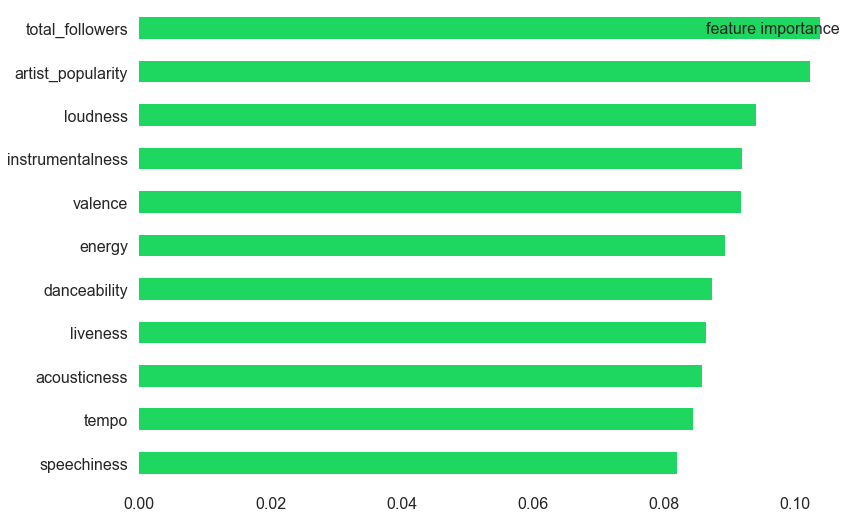

In [58]:
import seaborn as sns
import matplotlib.style as style
style.use('seaborn-dark')

df5 = pd.DataFrame(model.feature_importances_, index=['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',\
                'liveness', 'valence', 'tempo',  'total_followers', 'artist_popularity'],\
                columns=['feature importance']).sort_values('feature importance', ascending=True)
ax = df5.plot(kind='barh', color='#1ed761')
ax.set_facecolor('white')

# ax = sns.barplot(y=['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',\
#                 'liveness', 'valence', 'tempo',  'total_followers', 'artist_popularity'], x=model.feature_importances_)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=95)

Feature: 0, Score: -25.14439
Feature: 1, Score: 14.00648
Feature: 2, Score: 0.15879
Feature: 3, Score: 34.62432
Feature: 4, Score: 2.57775
Feature: 5, Score: 13.67533
Feature: 6, Score: 26.83808
Feature: 7, Score: 7.74535
Feature: 8, Score: -0.08338
Feature: 9, Score: -0.00000
Feature: 10, Score: -0.64555


[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

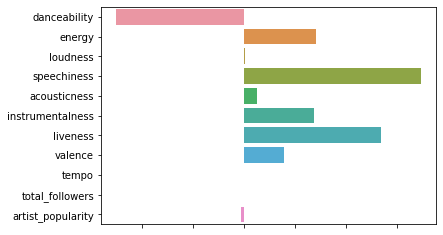

In [42]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset

# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
# pyplot.bar(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',\
#                 'liveness', 'valence', 'tempo'], importance)
# pyplot.show()

import seaborn as sns

ax = sns.barplot(y=['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',\
                'liveness', 'valence', 'tempo',  'total_followers', 'artist_popularity'], x=importance)
ax.set_xticklabels(ax.get_xticklabels(),rotation=95)

### LINEAR REGRESSION

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000243DFAAF970>,
      dtype=object)

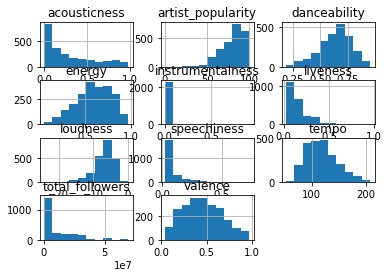

In [45]:
df2.hist(column = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',\
                'liveness', 'valence', 'tempo',  'total_followers', 'artist_popularity'])

In [61]:
corr=df2[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',\
                'liveness', 'valence', 'tempo',  'total_followers', 'artist_popularity', 'position']].corr()



<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

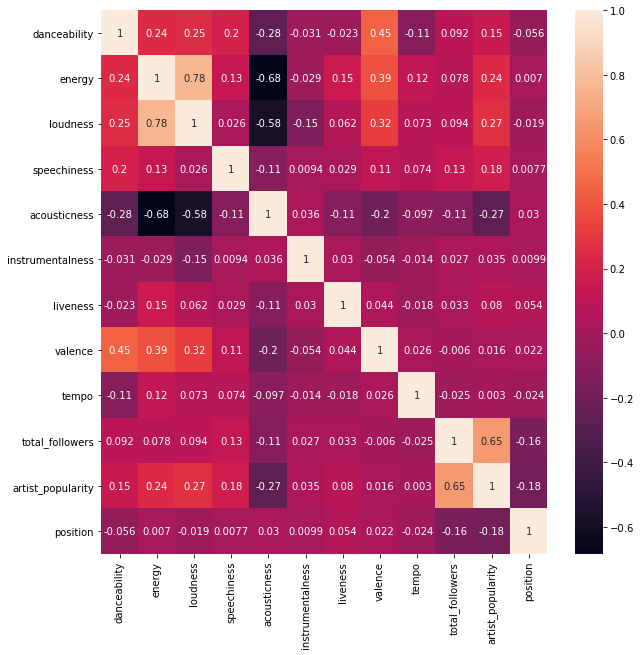

In [62]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot =True)
plt.show()

In [82]:
# create X and y
feature_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',\
                'liveness', 'valence', 'tempo', 'total_followers', 'artist_popularity']

# 'total_followers', 'artist_popularity'
X = df2[feature_cols]
y = df2['position']

lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
# pair the feature names with the coefficients
print(list(zip(feature_cols, lm.coef_)))

150.09671773371298
[('danceability', -25.14438900728237), ('energy', 14.006482334133745), ('loudness', 0.15878601067120665), ('speechiness', 34.624322647564476), ('acousticness', 2.577753213691181), ('instrumentalness', 13.675332478793381), ('liveness', 26.838076121527124), ('valence', 7.745349455487021), ('tempo', -0.08338288066782765), ('total_followers', -2.938593297585612e-07), ('artist_popularity', -0.6455467492016945)]


In [83]:
# calculate the R-squared
lm.score(X, y)

0.048304855933543056

In [97]:
# create X and y
feature_cols = ['total_followers', 'artist_popularity', 'danceability', 'liveness', 'acousticness']
X = df2[feature_cols]
y = df2['position']

lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
# pair the feature names with the coefficients
print(list(zip(feature_cols, lm.coef_)))

144.23110715987684
[('total_followers', -2.9721229192074286e-07), ('artist_popularity', -0.6037666583907628), ('danceability', -13.054519459827972), ('liveness', 30.53307798157601), ('acousticness', -3.844601428923183)]


In [98]:
# calculate the R-squared
lm.score(X, y)

0.042244641204018496

In [65]:
from sklearn.metrics import mean_squared_error
def RMSE(model, X, y):
    predicted = model.predict(X)
    rmse = (np.sqrt(mean_squared_error(y, predicted)))
    print('RMSE is {}'.format(rmse))

In [66]:
RMSE(lm, X, y)

RMSE is 58.65972612627895
